In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
symbol = "GOOGL"  # Google's stock symbol
start_date = "2015-01-01"
end_date = "2021-12-31"

data = yf.download(symbol, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [ ]:
scaler = MinMaxScaler()
data['Close_scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [ ]:
sequence_length = 10

X, y = [], []

for i in range(len(data) - sequence_length):
    X.append(data['Close_scaled'].values[i:i+sequence_length])
    y.append(data['Close_scaled'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Reshape and normalize data
X_train = X_train.reshape(-1, sequence_length, 1).astype(np.float32)
y_train = y_train.astype(np.float32)

# Build and compile the RNN model
model = Sequential([
    SimpleRNN(units=50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    SimpleRNN(units=50, activation='relu', return_sequences=True),
    SimpleRNN(units=50, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

# Train the model
callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=callbacks)


Epoch 1/200
44/44 [==============================] - 3s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0530
Epoch 2/200
44/44 [==============================] - 0s 11ms/step - loss: 1.5332e-04 - mean_absolute_error: 0.0090
Epoch 3/200
44/44 [==============================] - 1s 16ms/step - loss: 1.4239e-04 - mean_absolute_error: 0.0085
Epoch 4/200
44/44 [==============================] - 1s 15ms/step - loss: 1.2902e-04 - mean_absolute_error: 0.0080
Epoch 5/200
44/44 [==============================] - 1s 15ms/step - loss: 1.1240e-04 - mean_absolute_error: 0.0074
Epoch 6/200
44/44 [==============================] - 1s 15ms/step - loss: 1.0124e-04 - mean_absolute_error: 0.0071
Epoch 7/200
44/44 [==============================] - 0s 10ms/step - loss: 9.3458e-05 - mean_absolute_error: 0.0068
Epoch 8/200
44/44 [==============================] - 0s 10ms/step - loss: 1.0055e-04 - mean_absolute_error: 0.0070
Epoch 9/200
44/44 [==============================] - 0s 10ms/step - loss: 9.1435e-05 

In [ ]:
y_pred = model.predict(X_test)

11/11 [==============================] - 0s 4ms/step


In [ ]:
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)
y_test_original = scaler.inverse_transform(y_test)
y_pred_original = scaler.inverse_transform(y_pred)

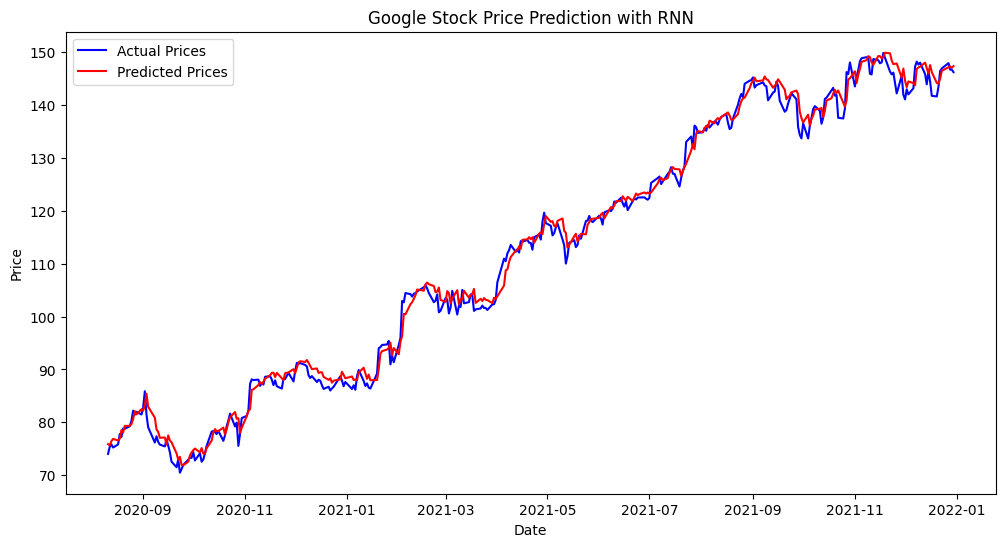

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+sequence_length:], y_test_original, label='Actual Prices', color='blue')
plt.plot(data.index[train_size+sequence_length:], y_pred_original, label='Predicted Prices', color='red')
plt.title('Google Stock Price Prediction with RNN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()